In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('glacier_statistics_reg11.csv', index_col=0)

In [9]:
df

rgi_region rgi_subregion                       name   cenlon  \
rgi_id                                                                         
RGI60-11.00001          11         11-01                        NaN  13.5987   
RGI60-11.00002          11         11-01                        NaN  13.6135   
RGI60-11.00003          11         11-01                        NaN  13.5960   
RGI60-11.00004          11         11-01                        NaN  13.5829   
RGI60-11.00005          11         11-01                        NaN  13.6026   
...                    ...           ...                        ...      ...   
RGI60-11.03923          11         11-01   Canin Ovest It4L00003004  13.4440   
RGI60-11.03924          11         11-01  Montasio Est It4L00003001  13.4440   
RGI60-11.03925          11         11-01                Canin Est I  13.4480   
RGI60-11.03926          11         11-01     Canin Est It4L00003002  13.4510   
RGI60-11.03927          11         11-01              Conca Prevala  13.4740   

                 cenlat  rgi_area_km2  rgi_year  main_flowline_length  \
rgi_id                                                                  
RGI60-11.00001  47.4949         0.122      2003                 420.0   
RGI60-11.00002  47.4845         2.292      2003                1922.0   
RGI60-11.00003  47.4835         0.851      2003                1380.0   
RGI60-11.00004  47.4807         0.053      2003                 390.0   
RGI60-11.00005  47.4774         0.057      2003                 208.0   
...                 ...           ...       ...                   ...   
RGI60-11.03923  46.3620         0.035      2012                 182.0   
RGI60-11.03924  46.4370         0.037      2012                 156.0   
RGI60-11.03925  46.3650         0.010      2012                  66.0   
RGI60-11.03926  46.3660         0.013      2012                 240.0   
RGI60-11.03927  46.3680         0.015      2012                 216.0   

                inv_volume_km3  reference_mb  reference_mb_err  
rgi_id                                                          
RGI60-11.00001        0.002594   -893.000000        465.100000  
RGI60-11.00002        0.099280   -524.800000        188.600000  
RGI60-11.00003        0.034132   -800.700000        224.100000  
RGI60-11.00004        0.000999   -383.100000        511.400000  
RGI60-11.00005        0.000999   -429.900000        436.900000  
...                        ...           ...               ...  
RGI60-11.03923        0.000493    465.900000        598.500000  
RGI60-11.03924        0.000473   -596.371893        400.749031  
RGI60-11.03925        0.000100   -596.371893        400.749031  
RGI60-11.03926        0.000283   -596.371893        400.749031  
RGI60-11.03927        0.000202   -596.371893        400.749031  

[3927 rows x 11 columns]

In [26]:
ds_lmr_online = xr.open_dataset('lmr_online_avg_reg11.nc')
ds_lmr_v21 = xr.open_dataset('lmr_v21_avg_reg11.nc')

In [15]:
ds_lmr_online

<xarray.Dataset>
Dimensions:         (time: 1021, rgi_id: 3591)
Coordinates:
  * time            (time) float64 1e+03 1.001e+03 ... 2.019e+03 2.02e+03
  * rgi_id          (rgi_id) object 'RGI60-11.00002' ... 'RGI60-11.03926'
    hydro_year      (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 1000 1001 1002 1003 ... 2017 2018 2019 2020
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Data variables:
    volume          (time, rgi_id) float32 ...
    volume_bsl      (time, rgi_id) float32 ...
    area            (time, rgi_id) float32 ...
    length          (time, rgi_id) float32 ...
    water_level     (time, rgi_id) float32 ...
    glen_a          (time, rgi_id) float32 ...
    fs              (time, rgi_id) float32 ...
Attributes:
    description:    OGGM model output
    oggm_version:   0.1.dev1384+gd197923
    calendar:       365-day no leap
    creation_date:  2024-06-30 19:17:39

In [12]:
vol = ds_lmr_online.volume.copy()

In [13]:
vol['rgi_id'] = range(0, len(vol.rgi_id))

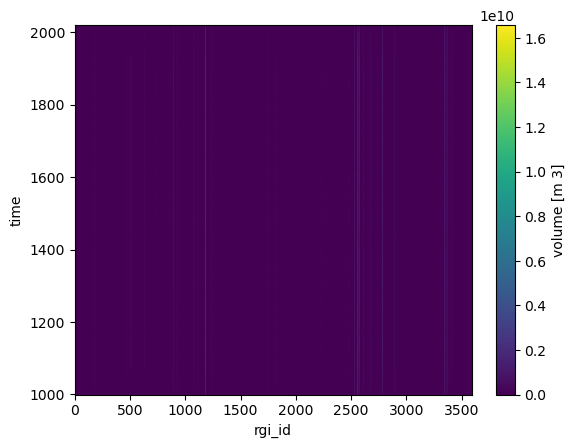

In [14]:
vol.plot();

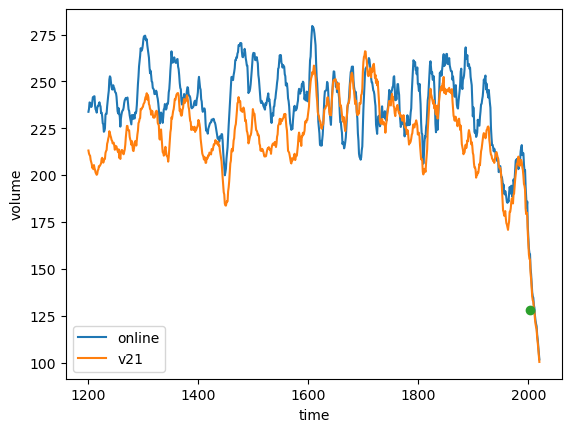

In [28]:
ts_lmr_online = ds_lmr_online.volume.sum(dim='rgi_id').sel(time=slice(1200, None)) * 1e-9
ts_lmr_v21 = ds_lmr_v21.volume.sum(dim='rgi_id').sel(time=slice(1200, None)) * 1e-9

ts_lmr_online.plot(label='online');
ts_lmr_v21.plot(label='v21');
plt.legend();

ref_volume = df.inv_volume_km3.sum()

plt.plot([2003], [ref_volume], 'o');

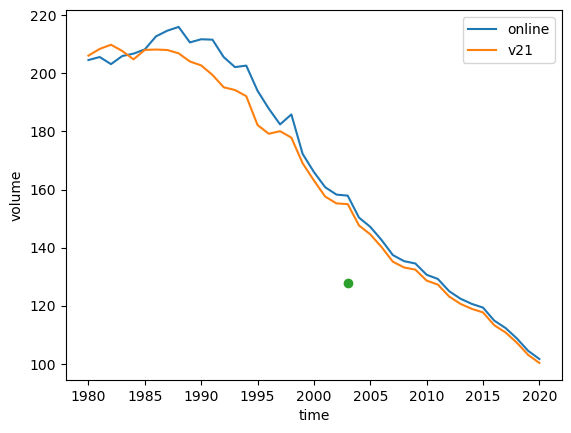

In [29]:
ts_lmr_online = ds_lmr_online.volume.sum(dim='rgi_id').sel(time=slice(1980, None)) * 1e-9
ts_lmr_v21 = ds_lmr_v21.volume.sum(dim='rgi_id').sel(time=slice(1980, None)) * 1e-9

ts_lmr_online.plot(label='online');
ts_lmr_v21.plot(label='v21');
plt.legend();

ref_volume = df.inv_volume_km3.sum()

plt.plot([2003], [ref_volume], 'o');

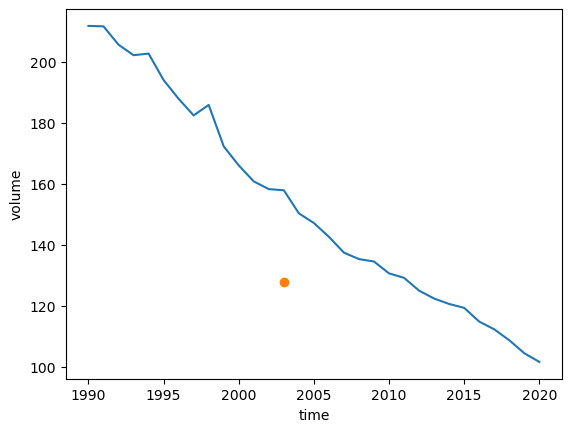

In [24]:
ts_lmr_online = ds_lmr_online.volume.sum(dim='rgi_id').sel(time=slice(1990, None)) * 1e-9

ts_lmr_online.plot();

ref_volume = df.inv_volume_km3.sum()

plt.plot([2003], [ref_volume], 'o');